In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
oneday = 86400.00
rearth = 6371220.00
twoomega = 1.4584e-4

circ = 2*np.pi*rearth    # circumference at equator

beta = twoomega/rearth  # in units [s^-1.m^-1]
betap = beta*oneday*circ  # in units [day^-1.rev^-1]

betap = betap/(2*np.pi)**2


/scratch/jp492/envs/endgame/lib/python2.7/site-packages/IPython/kernel/__main__.py:25: RuntimeWarning: divide by zero encountered in divide
/scratch/jp492/envs/endgame/lib/python2.7/site-packages/IPython/kernel/__main__.py:25: RuntimeWarning: invalid value encountered in sqrt
/scratch/jp492/envs/endgame/lib/python2.7/site-packages/IPython/kernel/__main__.py:25: RuntimeWarning: invalid value encountered in add
/scratch/jp492/envs/endgame/lib/python2.7/site-packages/IPython/kernel/__main__.py:26: RuntimeWarning: divide by zero encountered in divide
/scratch/jp492/envs/endgame/lib/python2.7/site-packages/IPython/kernel/__main__.py:26: RuntimeWarning: invalid value encountered in sqrt


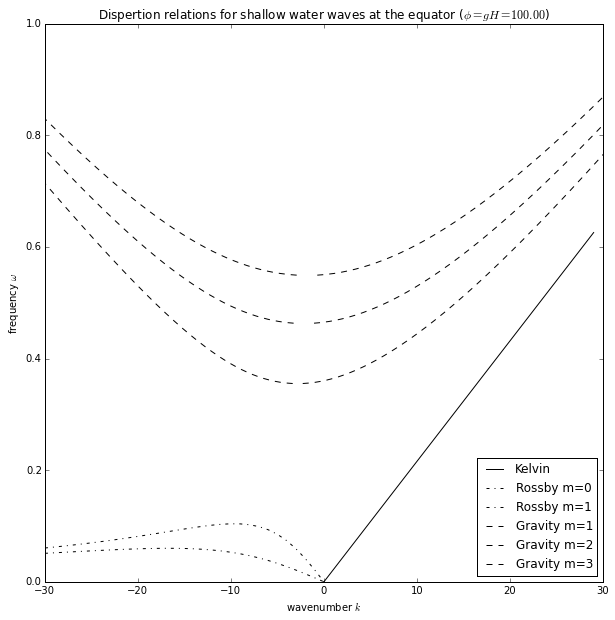

In [24]:
# frequency in cycles per day = [(86400 s)^-1]
# wavenumber in peaks per revolution of earth = [(2 * 6371220 * π m)^-1]
plt.figure(figsize=(10,10))
omega = np.linspace(0, 1,1000)   # in units [day^-1]
k = np.arange(-30,30)     # in units [rev^-1]  i.e. per revolution of earth at equator

g = 10.0
H = 10.0

wavespeed = c = np.sqrt(g*H)  # in [m.s^-1]
cp = c*oneday/circ            # in [rev.day^-1]

# kelvin waves:  c^2 = gH
#   dispertion relation omega = ck
plt.plot(k, cp*k, color='black', label='Kelvin')

# rossby waves:
#   dispertion relation omega = Uk - (beta*k)/(k^2 + l^2)      [Vallis 8.2.2]
for m in (0,1):
    plt.plot(k, -(betap*k / (k**2 + (2*m+1)*betap/cp)), linestyle='-.', color='black', label='Rossby m=%d' % m)

# poincaré waves:
#   dispertion relation omega^2 = c^2 k^2 + \beta c (2m + 1)   [Vallis 8.2.2]
for m in (1,2,3):
    gkp = -(betap / (2*omega)) + 0.5*np.sqrt(betap**2/omega**2 - 4*betap/cp*(2*m+1) + 4*omega**2/cp**2)
    gkm = -(betap / (2*omega)) - 0.5*np.sqrt(betap**2/omega**2 - 4*betap/cp*(2*m+1) + 4*omega**2/cp**2)
    plt.plot(gkp[omega > 0.3], omega[omega > 0.3], linestyle='--', color='black')
    plt.plot(gkm[omega > 0.3], omega[omega > 0.3],  linestyle='--', color='black', label='Gravity m=%d' % m)
    #plt.plot(k, np.sqrt(cp**2*k**2 + betap*cp*(2*m+1)), linestyle='--', label='Gravity m=%d' % m)
    
plt.ylim((0,1))
plt.xlim((-30,30))
plt.title('Dispertion relations for shallow water waves at the equator ($\phi = gH = %.2f$)' % (g*H))
plt.xlabel('wavenumber $k$')
plt.ylabel('frequency $\omega$')
plt.legend(loc='lower right')


